In [1]:
import pandas as pd
df=pd.read_csv("laptop_data.csv")

In [2]:
df.shape

(1303, 12)

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.shape

(1303, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
import re
import pandas as pd

def clean_memory(mem):
    mem = mem.replace(" ", "").lower()   
    ssd, hdd, flash, hybrid = 0, 0, 0, 0
    has_dual = "+" in mem                
    
    
    for part in mem.split("+"):
        
        match = re.search(r'(\d+\.?\d*)(tb|gb)', part)
        if match:
            size, unit = float(match.group(1)), match.group(2)
            size = int(size * 1024) if unit == "tb" else int(size)

            if "ssd" in part: ssd += size
            elif "hdd" in part: hdd += size
            elif "flash" in part: flash += size
            elif "hybrid" in part: hybrid += size

    return pd.Series([ssd, hdd, flash, hybrid, has_dual])


df[['SSD', 'HDD', 'FlashStorage', 'Hybrid', 'Has_Dual_Storage']] = df['Memory'].apply(clean_memory)
df.drop(columns=['Memory'], inplace=True)


In [10]:
df['OpSys'] = df['OpSys'].replace({
    'Mac OS X': 'macOS', 'macOS': 'macOS',
    'Windows 10': 'Windows', 'Windows 7': 'Windows', 'Windows': 'Windows',
    'No OS': 'NoOS', 'Linux': 'Linux', 'Chrome OS': 'ChromeOS'
})

In [11]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [12]:
import re
import numpy as np
import pandas as pd

def extract_screen(resolution):
    resolution = resolution.lower()
    tech = "Unknown"
    is_touchscreen = False

    # Detect display tech
    if "ips" in resolution:
        tech = "IPS"
    elif "retina" in resolution:
        tech = "Retina"
    elif "full hd" in resolution or "1920x1080" in resolution:
        tech = "Full HD"

    # Detect touchscreen
    if "touchscreen" in resolution:
        is_touchscreen = True

    # Extract numeric resolution (width x height)
    match = re.search(r'(\d+)x(\d+)', resolution)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    else:
        width, height = np.nan, np.nan

    
    aspect_ratio = round(width / height, 2) if width and height else np.nan

    return pd.Series([tech, width, height, aspect_ratio, is_touchscreen])


df[['Screen_Tech', 'Screen_Width', 'Screen_Height', 'Aspect_Ratio', 'Is_Touchscreen']] = df['ScreenResolution'].apply(extract_screen)
df.drop(columns=['ScreenResolution'], inplace=True)


In [13]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,FlashStorage,Hybrid,Has_Dual_Storage,Screen_Tech,Screen_Width,Screen_Height,Aspect_Ratio,Is_Touchscreen
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,0,0,0,False,IPS,2560,1600,1.60,False
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,128,0,False,Unknown,1440,900,1.60,False
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,NoOS,1.86,30636.0000,256,0,0,0,False,Full HD,1920,1080,1.78,False
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0,0,0,False,IPS,2880,1800,1.60,False
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256,0,0,0,False,IPS,2560,1600,1.60,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   Cpu               1274 non-null   object 
 4   Ram               1274 non-null   int64  
 5   Gpu               1274 non-null   object 
 6   OpSys             1274 non-null   object 
 7   Weight            1274 non-null   float64
 8   Price             1274 non-null   float64
 9   SSD               1274 non-null   int64  
 10  HDD               1274 non-null   int64  
 11  FlashStorage      1274 non-null   int64  
 12  Hybrid            1274 non-null   int64  
 13  Has_Dual_Storage  1274 non-null   bool   
 14  Screen_Tech       1274 non-null   object 
 15  Screen_Width      1274 non-null   int64  
 16  Screen_Height     1274 non-null   int64  
 17  

In [15]:
df.describe()

,Inches,Ram,Weight,Price,SSD,HDD,FlashStorage,Hybrid,Screen_Width,Screen_Height,Aspect_Ratio
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000
mean,15.022449,8.444270,2.040400,60503.185074,186.408163,422.131868,4.508634,7.632653,1900.463108,1074.144427,1.773611
std,1.429940,5.098291,0.669444,37333.222977,187.861902,530.228949,30.500079,86.935376,493.312718,283.865869,0.037364
min,10.100000,2.000000,0.690000,9270.720000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,1.500000
25%,14.000000,4.000000,1.500000,32495.605200,0.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,1.780000
50%,15.600000,8.000000,2.040000,52693.920000,256.000000,0.000000,0.000000,0.000000,1920.000000,1080.000000,1.780000
75%,15.600000,8.000000,2.310000,79773.480000,256.000000,1024.000000,0.000000,0.000000,1920.000000,1080.000000,1.780000
max,18.400000,64.000000,4.700000,324954.720000,1024.000000,2048.000000,512.000000,1024.000000,3840.000000,2160.000000,1.780000


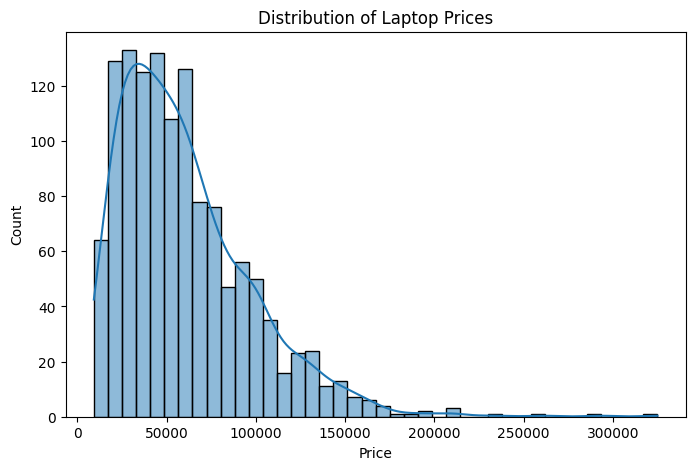

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


59874.14171519782


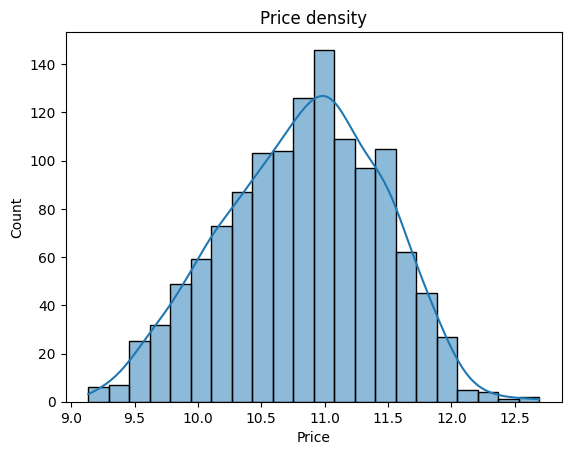

In [17]:
sns.histplot(np.log(df['Price']), kde=True)
plt.title("Price density")
print(np.exp(11))

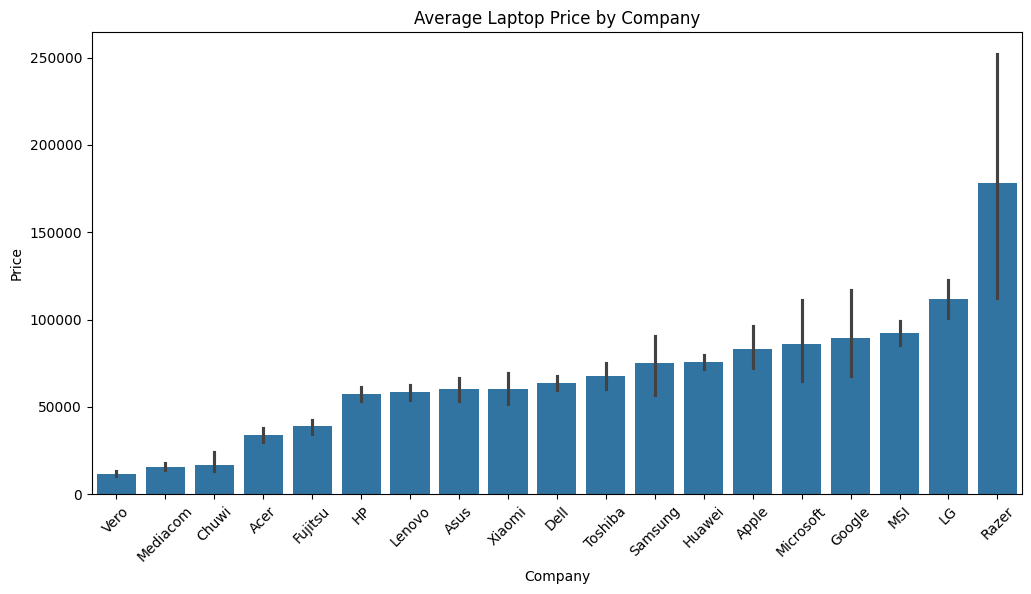

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='Company', y='Price', data=df, estimator='mean', order=df.groupby('Company')['Price'].mean().sort_values().index)
plt.xticks(rotation=45)
plt.title("Average Laptop Price by Company")
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_original = df.copy()
df_encoded_original = df.copy()
label_encoder = LabelEncoder()
for col in df_encoded_original.select_dtypes(include = ["object"]).columns:
    df_encoded_original[col + '_encoded'] = label_encoder.fit_transform(df_encoded_original[col])
    df[col] = label_encoder.fit_transform(df[col])

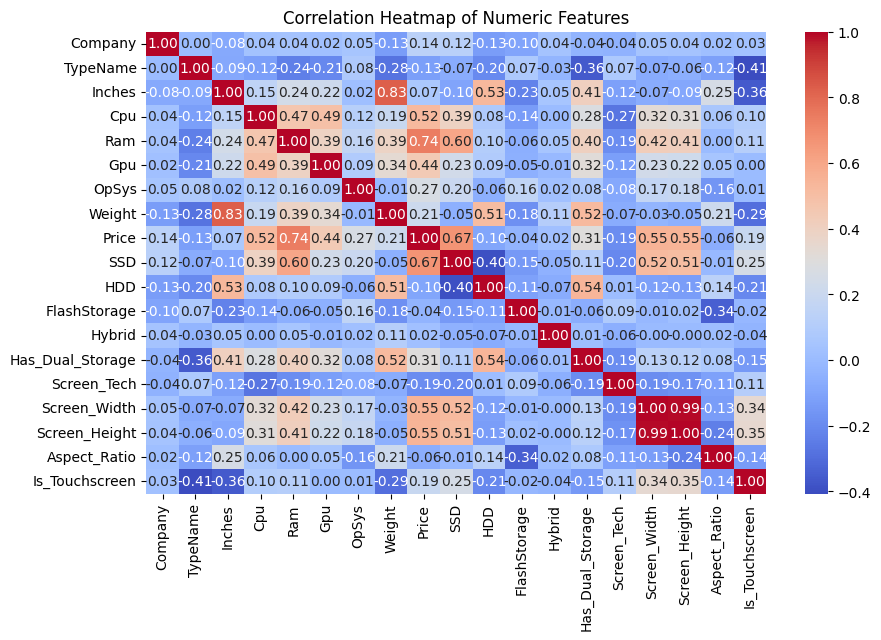

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [21]:

X = df.drop("Price", axis=1)
y = df["Price"]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


model_results = {}

def train_and_log(model, model_name, X_train, X_test, y_train, y_test, params={}):
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

      
        mlflow.log_param("model", model_name)
        for k, v in params.items():
            mlflow.log_param(k, v)

        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)

        
        mlflow.sklearn.log_model(model, model_name)

       
        model_results[model_name] = {"rmse": rmse, "r2": r2}

        print(f"{model_name} -> RMSE: {rmse:.2f}, R²: {r2:.3f}")


In [30]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

train_and_log(LinearRegression(), "LinearRegression", X_train, X_test, y_train, y_test)
train_and_log(Ridge(alpha=1.0), "Ridge", X_train, X_test, y_train, y_test, params={"alpha":1.0})
train_and_log(RandomForestRegressor(n_estimators=100, random_state=42),
              "RandomForest", X_train, X_test, y_train, y_test, params={"n_estimators":100})
train_and_log(GradientBoostingRegressor(n_estimators=100, random_state=42),
              "GradientBoosting", X_train, X_test, y_train, y_test, params={"n_estimators":100})


2025/09/16 22:25:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 22:25:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LinearRegression -> RMSE: 21703.12, R²: 0.725


2025/09/16 22:25:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 22:25:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Ridge -> RMSE: 21716.25, R²: 0.725


2025/09/16 22:25:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 22:26:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest -> RMSE: 15819.68, R²: 0.854


2025/09/16 22:26:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/16 22:26:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoosting -> RMSE: 15369.76, R²: 0.862


In [31]:
best_model = max(model_results, key=lambda x: model_results[x]["r2"])
best_metrics = model_results[best_model]
print(f"Model: {best_model}")
print(f"RMSE: {best_metrics['rmse']:.2f}, R²: {best_metrics['r2']:.3f}")


Model: GradientBoosting
RMSE: 15369.76, R²: 0.862
